## Import Necessary Libraries

In [113]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [114]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

testid = test['PassengerId']

## Exploratory Data Analysis

In [115]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
features = ['Survived', 'Pclass', 'Sex', 'Parch', "Embarked"]
for feature in features:
    unique_values = train[feature].unique()
    print(f"Unique values for {feature}: {unique_values}")

Unique values for Survived: [0 1]
Unique values for Pclass: [3 1 2]
Unique values for Sex: ['male' 'female']
Unique values for Parch: [0 1 2 5 3 4 6]
Unique values for Embarked: ['S' 'C' 'Q' nan]


In [117]:
rows, columns = train.shape
print(f"The dataset has {rows} rows and {columns} columns" )

The dataset has 891 rows and 12 columns


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
# Check for NaN values in our dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
#Calculate the percentage of missing values for each feature in dataset
missing_percentage = (train.isna().sum() / len(train)) * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [122]:
duplicates = train.duplicated().sum()
print(f"There are {duplicates} in the dataset")

There are 0 in the dataset


In [123]:
num_features = train[["Age", "Fare", "Parch", "SibSp"]]
cat_features = train[["Survived", "Pclass", "Embarked", "Sex" , 'Parch', 'SibSp' ]]

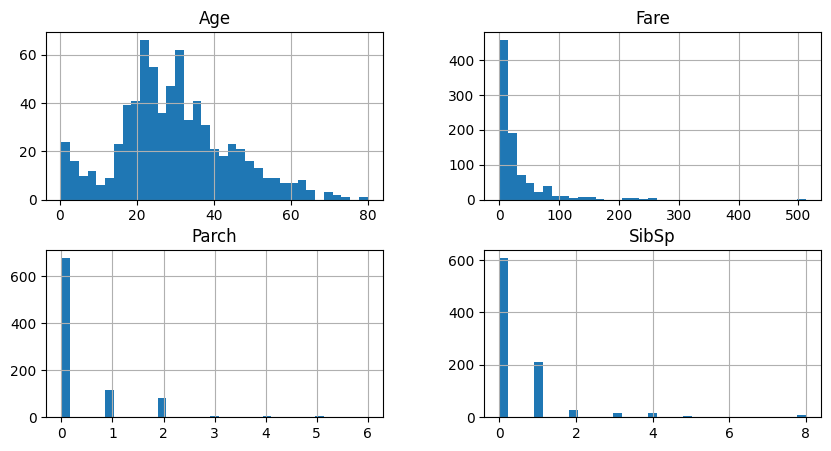

In [124]:
num_features.hist(bins=35, figsize=(10, 5))
plt.show()


<Axes: >

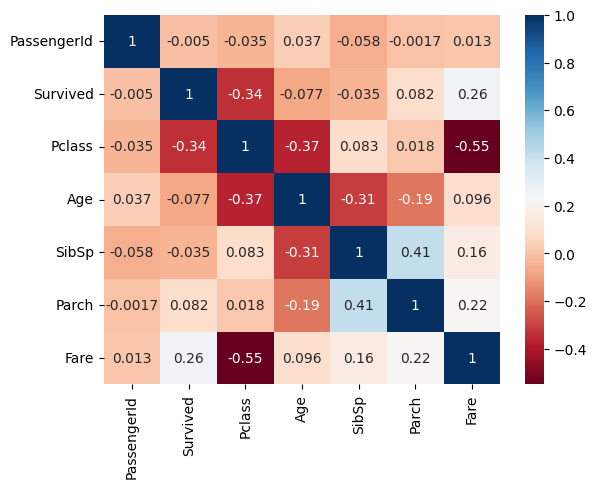

In [125]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
numeric_train = train[numeric_columns]

# Calculate correlation matrix and create the heatmap
correlation_matrix = numeric_train.corr()
sns.heatmap(correlation_matrix, cmap="RdBu", annot=True)


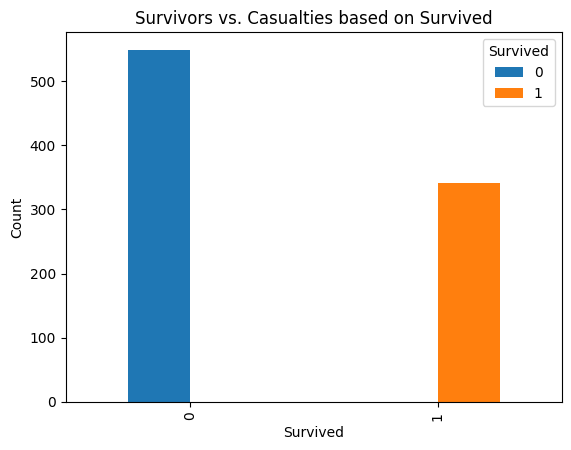

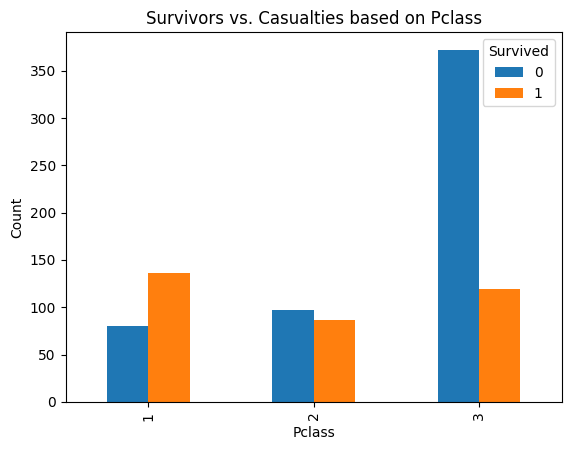

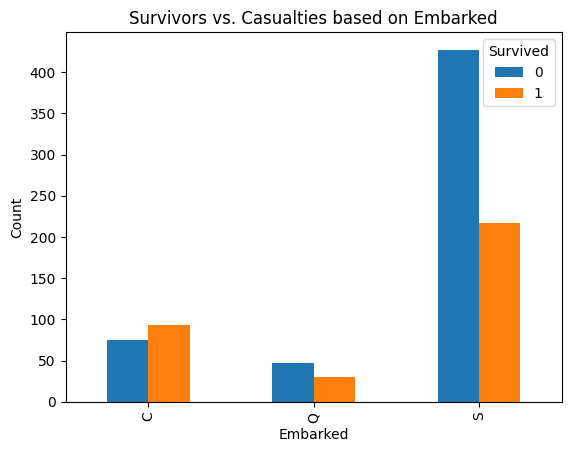

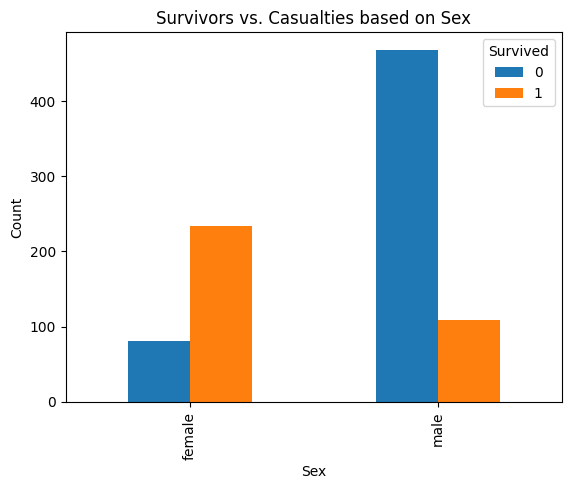

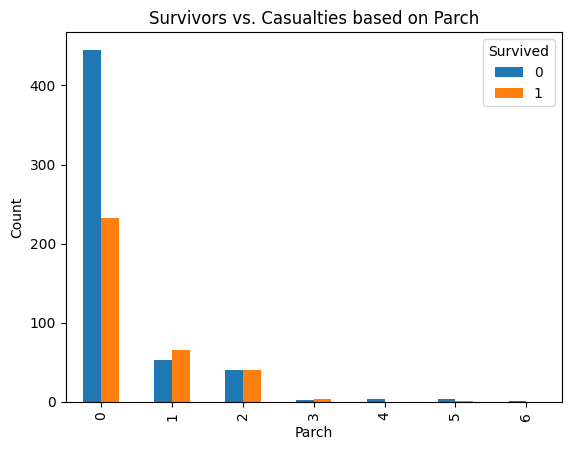

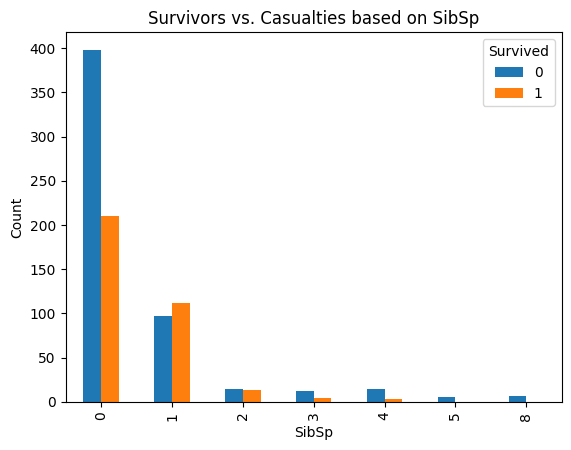

In [126]:
# Visualize categorcal features in dataset
for i in cat_features.columns:
    grouped = train.groupby([i, 'Survived']).size().unstack()

    # Create the bar plot
    grouped.plot(kind='bar', stacked=False)

    # Set the labels and title
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Survivors vs. Casualties based on {i}')

    # Show the plot
    plt.show()

## Cleaning data

In [127]:

features_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId' ]
train = train.drop(features_to_drop, axis=1)
test = test.drop(features_to_drop, axis=1)
train= train.dropna(subset=['Embarked'])

In [128]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [129]:

age_data = train['Age'].values.reshape(-1, 1)

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the 'age' data
imputed_age = imputer.fit_transform(age_data)

# Replace the original 'age' column with the imputed values
train['Age'] = imputed_age

In [130]:
train.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [131]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [132]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [133]:
# Fill NaN value in 'fare' feature
fare_mean = test['Fare'].mean()
test['Fare'].fillna(fare_mean, inplace=True)

In [134]:

age_data = test['Age'].values.reshape(-1, 1)

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the 'age' data
imputed_age = imputer.fit_transform(age_data)

# Replace the original 'age' column with the imputed values
test['Age'] = imputed_age

In [135]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [136]:
test.loc[test['Sex']=='male','Sex']=0
test.loc[test['Sex']=='female','Sex']=1

test.loc[test['Embarked']=='S','Embarked']=0
test.loc[test['Embarked']=='C','Embarked']=1
test.loc[test['Embarked']=='Q','Embarked']=2

# Change catogorical data to numeric
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1

train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2

In [137]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [138]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


## Model Building

In [139]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

rfc = RandomForestClassifier(n_estimators=100, max_features='log2').fit(X_train, y_train)

In [141]:
from sklearn.metrics import classification_report
pred = rfc.predict(X_test)

print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.83      0.86      0.84       163
           1       0.77      0.72      0.74       104

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267

